In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score,\
    confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve
import seaborn as sns
f1_scores=[]

In [13]:
dataframe = pd.read_csv("../Preprocessing/preprocessdffixed.csv")
dataframe = dataframe.drop(['Unnamed: 0' ], axis=1)
dataframe.loc[dataframe['Total Stars']>0.17, 'Total Stars'] = int(1)
dataframe.loc[dataframe['Total Stars']<=0.17, 'Total Stars'] = int(0)
dataframe['Total Stars'] = dataframe['Total Stars'].round()
X_total_stars = dataframe.drop('Total Stars', axis=1).values
y_total_stars = dataframe['Total Stars']
dataframe
X_to_split = dataframe.drop('Total Stars', axis=1).values
y_to_split = dataframe['Total Stars']
y_to_split

X_train, X_test, y_train, y_test \
    = train_test_split(X_to_split, y_to_split)


70     0.0
250    0.0
318    1.0
187    0.0
131    1.0
      ... 
19     1.0
208    0.0
11     0.0
258    1.0
305    0.0
Name: Total Stars, Length: 260, dtype: float64
Accuracy on train
0.9923076923076923
Train Precision
1.0
Train Recall
0.9545454545454546
Train F1
0.9767441860465117


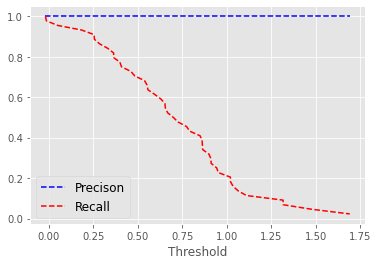

In [14]:
LR = LogisticRegression(solver='lbfgs')
LR.fit(X_train, y_train)

y_pred = LR.predict(X_train)
print(y_train)

y_scores = LR.decision_function(X_train)
pre, rec, thres = precision_recall_curve(y_train, y_scores)
plt.plot(thres, pre[:-1], 'b--', label="Precison")
plt.plot(thres, rec[:-1], 'r--', label="Recall")
plt.xlabel("Threshold", fontsize=12)
plt.legend(fontsize=12)
print("Accuracy on train")
print(LR.score(X_train, y_train))
print("Train Precision")
print(precision_score(y_train, y_pred))
print("Train Recall")
print(recall_score(y_train, y_pred))
print("Train F1")
print(f1_score(y_train, y_pred))


Accuracy on Test
0.8275862068965517
Test Precision
1.0
Test Recall
0.2857142857142857
Test F1
0.4444444444444445


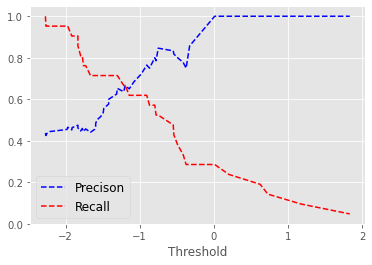

In [15]:

y_pred = LR.predict(X_test)

y_scores = LR.decision_function(X_test)
pre, rec, thres = precision_recall_curve(y_test, y_scores)
plt.plot(thres, pre[:-1], 'b--', label="Precison")
plt.plot(thres, rec[:-1], 'r--', label="Recall")
plt.xlabel("Threshold", fontsize=12)
plt.legend(fontsize=12)
print("Accuracy on Test")
print(LR.score(X_test, y_test))
print("Test Precision")
print(precision_score(y_test, y_pred))
print("Test Recall")
print(recall_score(y_test, y_pred))
print("Test F1")
print(f1_score(y_test, y_pred))
f1_scores.append(f1_score(y_test, y_pred))

In [16]:
threshold = thres[np.where(rec > .60)][-1]
threshold

y_pre_th = (y_scores > threshold)
print('For using threshold where recall > 60')
print('Precison')
print(precision_score(y_test, y_pre_th))
print('Recall')
print(recall_score(y_test, y_pre_th))
print('F1 Score')
print(f1_score(y_test, y_pre_th))
f1_scores.append(f1_score(y_test, y_pre_th))

For using threshold where recall > 60
Precison
0.75
Recall
0.5714285714285714
F1 Score
0.6486486486486486


Area under the ROC Curve


0.8823953823953823

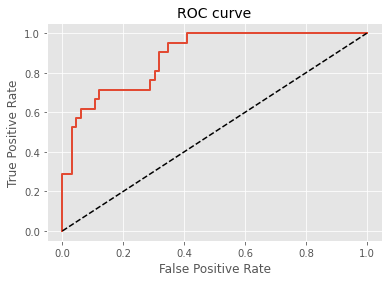

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.plot(fpr, tpr, lw=2);
plt.plot([0,1],[0,1], 'k--');
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC curve', fontsize=14);
# roc auc score 
print('Area under the ROC Curve')
roc_auc_score(y_test, y_scores)

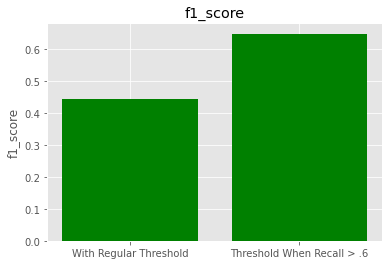

In [18]:

%matplotlib inline
plt.style.use('ggplot')

x = ['With Regular Threshold', 'Threshold When Recall > .6']

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, f1_scores, color='green')
plt.ylabel("f1_score")
plt.title("f1_score")
plt.xticks(x_pos, x)

plt.show()

                       


# User rating

In [19]:
f1_scores=[]
dataframe = pd.read_csv("../Preprocessing/preprocessdffixed.csv")
dataframe = dataframe.drop(['Unnamed: 0' ], axis=1)
dataframe.loc[dataframe['User Rating']>0.8, 'Total Stars'] = int(1)
dataframe.loc[dataframe['User Rating']<=0.8, 'Total Stars'] = int(0)
dataframe['User Rating'] = dataframe['User Rating'].round()
X_total_stars = dataframe.drop('User Rating', axis=1).values
y_total_stars = dataframe['User Rating']
dataframe
X_to_split = dataframe.drop('User Rating', axis=1).values
y_to_split = dataframe['User Rating']
y_to_split

X_train, X_test, y_train, y_test \
    = train_test_split(X_to_split, y_to_split)


242    1.0
59     1.0
201    0.0
49     1.0
32     1.0
      ... 
224    1.0
330    1.0
301    1.0
272    1.0
133    1.0
Name: User Rating, Length: 260, dtype: float64
Accuracy on train
0.9730769230769231
Train Precision
0.9728682170542635
Train Recall
1.0
Train F1
0.9862475442043221


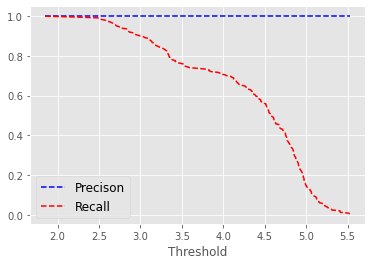

In [20]:
LR = LogisticRegression(solver='lbfgs')
LR.fit(X_train, y_train)

y_pred = LR.predict(X_train)
print(y_train)

y_scores = LR.decision_function(X_train)
pre, rec, thres = precision_recall_curve(y_train, y_scores)
plt.plot(thres, pre[:-1], 'b--', label="Precison")
plt.plot(thres, rec[:-1], 'r--', label="Recall")
plt.xlabel("Threshold", fontsize=12)
plt.legend(fontsize=12)
print("Accuracy on train")
print(LR.score(X_train, y_train))
print("Train Precision")
print(precision_score(y_train, y_pred))
print("Train Recall")
print(recall_score(y_train, y_pred))
print("Train F1")
print(f1_score(y_train, y_pred))


User Rating
Accuracy on Test
0.9425287356321839
Test Precision
0.9425287356321839
Test Recall
1.0
Test F1
0.9704142011834319


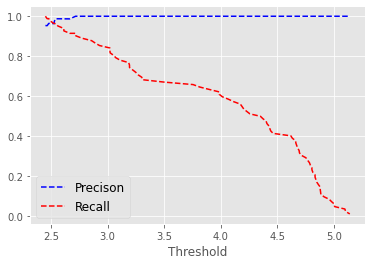

In [21]:
print('User Rating')

y_pred = LR.predict(X_test)

y_scores = LR.decision_function(X_test)
pre, rec, thres = precision_recall_curve(y_test, y_scores)
plt.plot(thres, pre[:-1], 'b--', label="Precison")
plt.plot(thres, rec[:-1], 'r--', label="Recall")
plt.xlabel("Threshold", fontsize=12)
plt.legend(fontsize=12)
print("Accuracy on Test")
print(LR.score(X_test, y_test))
print("Test Precision")
print(precision_score(y_test, y_pred))
print("Test Recall")
print(recall_score(y_test, y_pred))
print("Test F1")
print(f1_score(y_test, y_pred))
f1_scores.append(f1_score(y_test, y_pred))

Area under the ROC Curve


0.9658536585365854

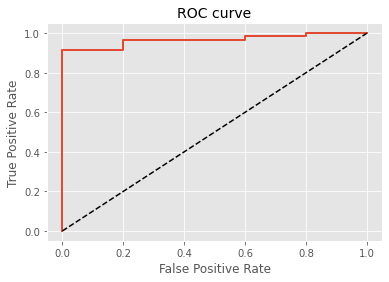

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.plot(fpr, tpr, lw=2);
plt.plot([0,1],[0,1], 'k--');
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC curve', fontsize=14);
# roc auc score 
print('Area under the ROC Curve')
roc_auc_score(y_test, y_scores)